<a href="https://colab.research.google.com/github/siddhantjain07/Tensorflow-in-Practice/blob/master/2.TF-CNNs/TF_CNNs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

##Getting the dataset

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

In [ ]:
import os
import zipfile

zip_dir = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_dir, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

#Directory for training data
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

#Directory for validation data
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.483.jpg', 'cat.782.jpg', 'cat.26.jpg', 'cat.396.jpg', 'cat.326.jpg', 'cat.830.jpg', 'cat.654.jpg', 'cat.477.jpg', 'cat.663.jpg', 'cat.858.jpg']
['dog.825.jpg', 'dog.413.jpg', 'dog.970.jpg', 'dog.260.jpg', 'dog.793.jpg', 'dog.983.jpg', 'dog.10.jpg', 'dog.277.jpg', 'dog.738.jpg', 'dog.393.jpg']


In [ ]:
print('Total training images for dogs :', len(os.listdir(train_dogs_dir)))
print('Total training images for cats :', len(os.listdir(train_cats_dir)))

print('Total validation images for dogs :', len(os.listdir(val_dogs_dir)))
print('Total validation images for dogs :', len(os.listdir(val_dogs_dir)))

Total training images for dogs : 1000
Total training images for cats : 1000
Total validation images for dogs : 500
Total validation images for dogs : 500


##Visuaizing image data

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

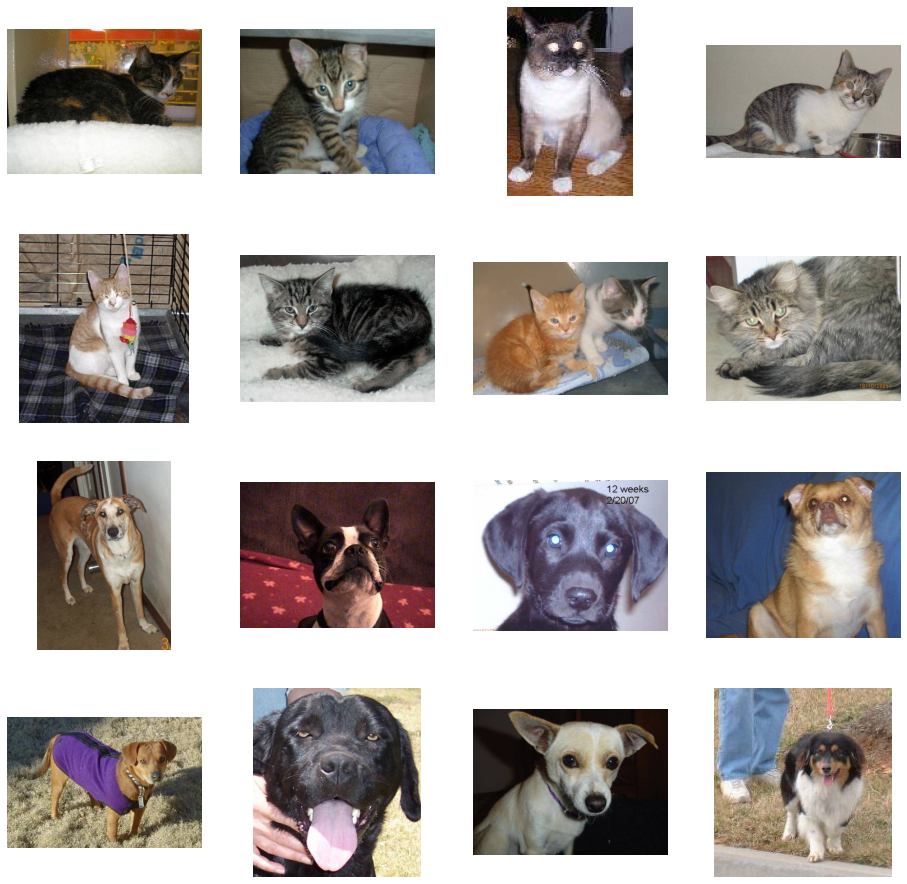

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Model

In [ ]:
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation=tf.nn.relu, input_shape=(150, 150, 3)),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
   tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),
   tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
   tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2),

   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation=tf.nn.relu),
   tf.keras.layers.Dense(1, activation=tf.nn.sigmoid),      

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [17]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150, 150),
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    batch_size = 20,
    class_mode = 'binary',
    target_size = (150, 150),
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=100,
                              epochs=15,
                              validation_steps=50,
                              verbose=2)

Epoch 1/15
100/100 - 57s - loss: 0.5752 - accuracy: 0.7040 - val_loss: 0.5885 - val_accuracy: 0.7010
Epoch 2/15
100/100 - 62s - loss: 0.4997 - accuracy: 0.7500 - val_loss: 0.7018 - val_accuracy: 0.6330
Epoch 3/15
100/100 - 57s - loss: 0.4170 - accuracy: 0.7965 - val_loss: 0.5686 - val_accuracy: 0.7230
Epoch 4/15
100/100 - 57s - loss: 0.3470 - accuracy: 0.8455 - val_loss: 0.6832 - val_accuracy: 0.7170
Epoch 5/15
100/100 - 57s - loss: 0.2525 - accuracy: 0.8925 - val_loss: 0.7214 - val_accuracy: 0.7180
Epoch 6/15
100/100 - 57s - loss: 0.1826 - accuracy: 0.9335 - val_loss: 1.2408 - val_accuracy: 0.6890
Epoch 7/15
100/100 - 58s - loss: 0.1316 - accuracy: 0.9455 - val_loss: 1.0118 - val_accuracy: 0.7120
Epoch 8/15
100/100 - 57s - loss: 0.0977 - accuracy: 0.9655 - val_loss: 1.2324 - val_accuracy: 0.7270
Epoch 9/15
100/100 - 57s - loss: 0.0824 - accuracy: 0.9695 - val_loss: 1.3420 - val_accuracy: 0.7270
Epoch 10/15
100/100 - 56s - loss: 0.0895 - accuracy: 0.9785 - val_loss: 1.4215 - val_accura

##Running the model

In [22]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


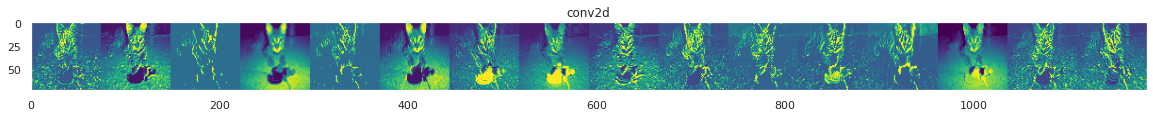

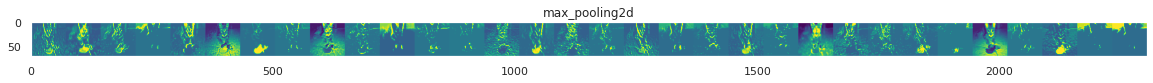

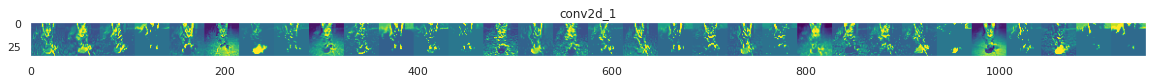

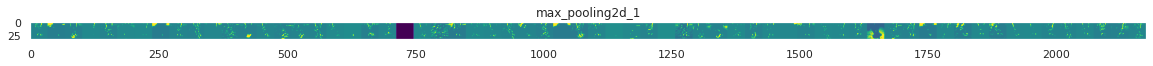

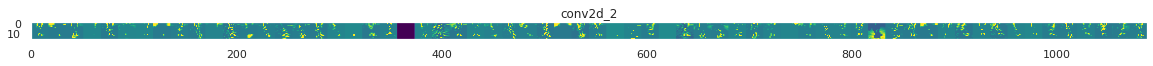

In [23]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

##Accuracy and loss 

Text(0.5, 1.0, 'Training and validation loss')

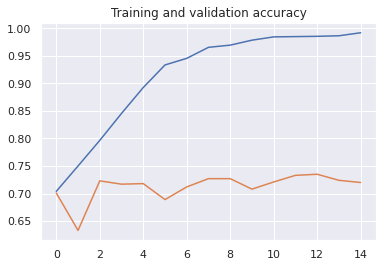

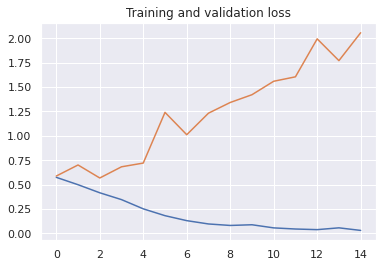

In [24]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )